In [102]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import os
import re
import nltk

In [103]:
def create_distribution(dataFile):
    
    return sns.countplot(x='label', data=dataFile, palette='hls')

In [104]:
train=pd.read_csv('../fake-news/train.csv')
test=pd.read_csv('../fake-news/test.csv')

In [105]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [107]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


AxesSubplot(0.125,0.125;0.775x0.755)


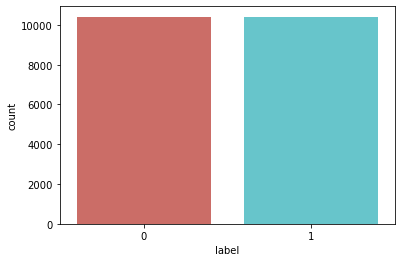

In [108]:
print(create_distribution(train)) # 0-FAKE 1-REAL

In [109]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [110]:
print(train.isnull().sum())
print('--------------')
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
--------------
id          0
title     122
author    503
text        7
dtype: int64


In [111]:
test=test.fillna(' ')
train=train.fillna(' ')
test['total']=test['title']+' '+test['author']+' '+test['text']
train['total']=train['title']+' '+train['author']+' '+train['text']

In [112]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [113]:
# train['total'][0]

# Creating Wordcloud Visuals

In [47]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 

# iterate the train file for fake and real news, respectively
for total in train[train['label']==1]['total']: 
  
    # split the sentence
    tokens = total.split() 
      
    # Change each tokens into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for total in train[train['label']==0]['total']: 
      
    # split the sentence
    tokens = total.split() 
      
    # Change each tokens into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

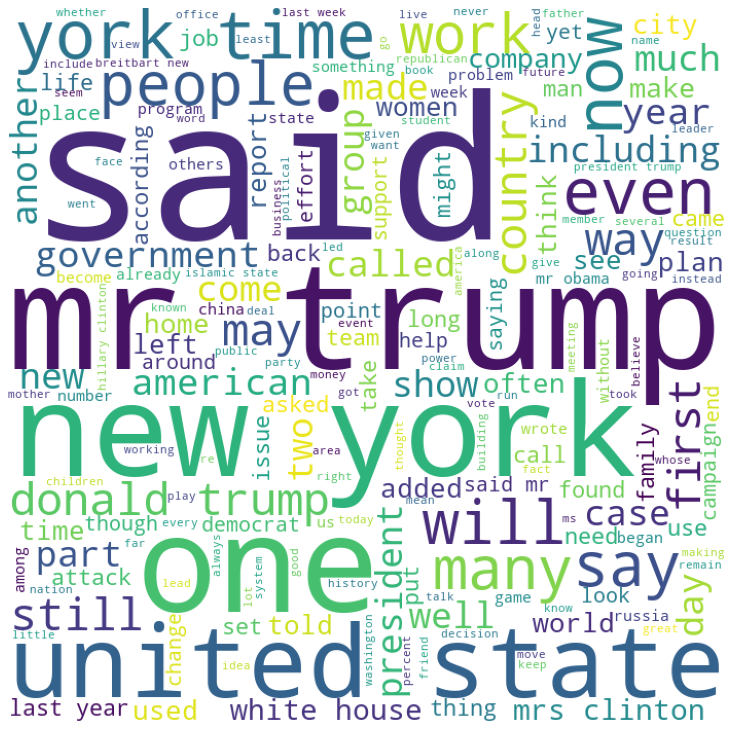

In [49]:
wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Cleaning and preprocessing 

# 1. Regex

In [114]:
#Remove punctuations from the String  
s = "@@#@!@!hello we%%^^& l!!!i##ke&^^%$ to #$%de**&%$#tect*&^%$# fake##%%%^& news))(*&^%$#"

In [115]:
s = re.sub(r'[^\w\s]','',s)

In [116]:
print(s)

hello we like to detect fake news


# 2. Tokenization

In [15]:
#Downloading nltk data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [117]:
nltk.word_tokenize("Hello my name is Joongwoo Park")

['Hello', 'my', 'name', 'is', 'Joongwoo', 'Park']

# 3. StopWords

In [118]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [119]:
sentence = "Today is your feed of top stories curated by Apple News editors, and stories from the channels and topics that you follow. Your feed also shows you stories suggested by Siri and trending stories that are popular with other readers. As you read, Apple News learns your interests, then suggests stories that you might like.l"

In [120]:
words = nltk.word_tokenize(sentence)
words = [w for w in words if w not in stop_words]
#words

# 4. Lemmatization

In [121]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

input_str="had been briefly taught languages by teachers in cities"

In [122]:
#Tokenize the sentence
input_str=nltk.word_tokenize(input_str)

#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word))

had
been
briefly
taught
language
by
teacher
in
city


# Application

In [123]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total'].lower()
    sentence = re.sub(r'[^\w\s]','',sentence) #data cleanUp
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #removing stopwords 
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word))
        
    train.loc[index,'total'] = filter_sentence


In [124]:
train = train[['total','label']]

In [125]:
train.head()

,total,label
0,house dem aide didnt even see comeys letter j...,1
1,flynn hillary clinton big woman campus breitb...,0
2,truth might get fired consortiumnewscom truth...,1
3,15 civilian killed single u airstrike identif...,1
4,iranian woman jailed fictional unpublished st...,1


In [62]:
# train['total'][0]

# Application of NLP

In [126]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [127]:
X_train = train['total']
Y_train = train['label']

# Bag-of-words

In [128]:
corpus = [
    'I am hungry',
    'when pandemic ends when I will go eating',
    'when it all ends'
    ]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['all', 'am', 'eating', 'ends', 'go', 'hungry', 'it', 'pandemic', 'when', 'will']


In [129]:
print(X.toarray())

[[0 1 0 0 0 1 0 0 0 0]
 [0 0 1 1 1 0 0 1 2 1]
 [1 0 0 1 0 0 1 0 1 0]]


# TF-iDF Vectorizer

In [130]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer(stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features)
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [131]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30)

In [132]:
tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

# Application

In [133]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [148]:
# tf_idf_matrix.toarray().shape

# Modelling

In [134]:
test_counts = count_vectorizer.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

In [135]:
print(X_train.shape,X_test.shape)

(15600, 202401) (5200, 202401)


# Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression
log_R = LogisticRegression(C=1e5)
log_R.fit(X_train, y_train)
pred = log_R.predict(X_test)
print('Accuracy of Logistic Regression classifier on training dataset: {:.2f}'
     .format(log_R.score(X_train, y_train)))
print('Accuracy of Logistic Regression classifier on test dataset: {:.2f}'
     .format(log_R.score(X_test, y_test)))
conf_matrix = confusion_matrix(y_test, pred)
conf_matrix

Accuracy of Logistic Regression classifier on training dataset: 1.00
Accuracy of Logistic Regression classifier on test dataset: 0.98


C:\Users\pjwoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2485,   79],
       [  49, 2587]], dtype=int64)

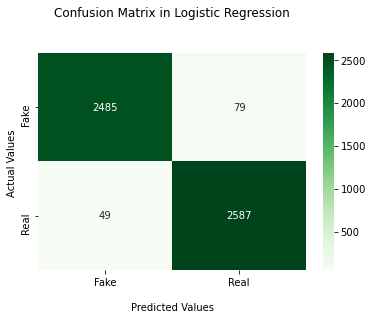

In [137]:
import seaborn as sns

ax = sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt = 'd')

ax.set_title('Confusion Matrix in Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Fake','Real'])
ax.yaxis.set_ticklabels(['Fake','Real'])
plt.show()

# MultinomialNB

In [138]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_test)
print('Accuracy of MNB classifier on training dataset: {:.2f}'
     .format(MNB.score(X_train, y_train)))
print('Accuracy of MNB classifier on test dataset: {:.2f}'
     .format(MNB.score(X_test, y_test)))
conf_matrix = confusion_matrix(y_test, pred)
conf_matrix

Accuracy of MNB classifier on training dataset: 0.88
Accuracy of MNB classifier on test dataset: 0.83


array([[2555,    9],
       [ 850, 1786]], dtype=int64)

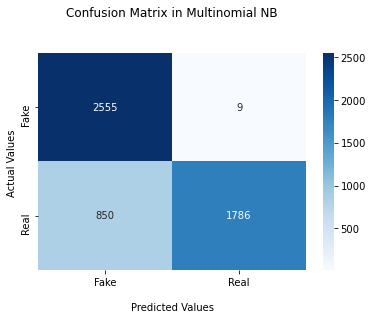

In [139]:
import seaborn as sns

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt = 'd')

ax.set_title('Confusion Matrix in Multinomial NB\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Fake','Real'])
ax.yaxis.set_ticklabels(['Fake','Real'])
plt.show()

# Pipeline

In [154]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [155]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [156]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [157]:
print(pipeline.fit(X_train, Y_train))

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])


C:\Users\pjwoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [158]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

array([0], dtype=int64)

In [159]:
#save the pipeline
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']

In [160]:
filename = './pipeline.sav'

# Prediction

In [161]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
print(result) 

[0]
